# **Boston Crime Data Analysis**

Group Members:
1. Keertana Kamesh
2. Supreeth Bare
3. Jaideep Juneja
4. Ksheeraja Raghavan

Link to the dataset - https://www.kaggle.com/sourinroy/boston-crime-dataset-updated-july-2020

1. Data Exploration
2. Data Cleaning
3. Cleaned Data Set
4. Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## **Data Exploration**



In [2]:
df=pd.read_csv('Boston Crime Dataset (updated July 2020).csv')

In [3]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,TESTTEST2,423,NaN,ASSAULT - AGGRAVATED,External,,0,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)"
1,S97333701,3301,NaN,VERBAL DISPUTE,C6,915,0,2020-07-18 14:34:00,2020,7,Saturday,14,NaN,MARY BOYLE WAY,42.330813,-71.051368,"(42.33081300, -71.05136800)"
2,S47513131,2647,NaN,THREATS TO DO BODILY HARM,E18,530,0,2020-06-24 10:15:00,2020,6,Wednesday,10,NaN,READVILLE ST,42.239491,-71.135954,"(42.23949100, -71.13595400)"
3,I92102201,3301,NaN,VERBAL DISPUTE,E13,583,0,2019-12-20 03:08:00,2019,12,Friday,3,NaN,DAY ST,42.325122,-71.107779,"(42.32512200, -71.10777900)"
4,I92097173,3115,NaN,INVESTIGATE PERSON,C11,355,0,2019-10-23 00:00:00,2019,10,Wednesday,0,NaN,GIBSON ST,42.297555,-71.059709,"(42.29755500, -71.05970900)"


In [4]:
df.tail()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
501065,20224065,3018,NaN,SICK/INJURED/MEDICAL - POLICE,B2,282,0,2020-03-19 07:30:00,2020,3,Thursday,7,NaN,WASHINGTON ST,42.353272,-71.173738,"(42.35327200, -71.17373800)"
501066,20202856,2672,NaN,BIOLOGICAL THREATS,B2,282,0,2020-03-19 08:30:00,2020,3,Thursday,8,NaN,WARREN ST,42.328234,-71.083289,"(42.32823400, -71.08328900)"
501067,20046400,1501,NaN,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,330,0,2020-07-02 01:38:00,2020,7,Thursday,1,NaN,PASADENA RD,42.305760,-71.083771,"(42.30576000, -71.08377100)"
501068,20038446,1501,NaN,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,300,0,2020-06-03 01:15:00,2020,6,Wednesday,1,NaN,WASHINGTON ST,42.323807,-71.089150,"(42.32380700, -71.08915000)"
501069,20030892,540,NaN,BURGLARY - COMMERICAL,C11,380,0,2020-05-03 00:00:00,2020,5,Sunday,0,NaN,GALLIVAN BLVD,42.283700,-71.047761,"(42.28370000, -71.04776100)"


In [5]:
df.shape

(501070, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501070 entries, 0 to 501069
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      501070 non-null  object 
 1   OFFENSE_CODE         501070 non-null  int64  
 2   OFFENSE_CODE_GROUP   426839 non-null  object 
 3   OFFENSE_DESCRIPTION  501070 non-null  object 
 4   DISTRICT             498644 non-null  object 
 5   REPORTING_AREA       501070 non-null  object 
 6   SHOOTING             75977 non-null   object 
 7   OCCURRED_ON_DATE     501070 non-null  object 
 8   YEAR                 501070 non-null  int64  
 9   MONTH                501070 non-null  int64  
 10  DAY_OF_WEEK          501070 non-null  object 
 11  HOUR                 501070 non-null  int64  
 12  UCR_PART             426729 non-null  object 
 13  STREET               482041 non-null  object 
 14  Lat                  471721 non-null  float64
 15  Long             

In [7]:
df.isna().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP      74231
OFFENSE_DESCRIPTION         0
DISTRICT                 2426
REPORTING_AREA              0
SHOOTING               425093
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                74341
STREET                  19029
Lat                     29349
Long                    29349
Location                    0
dtype: int64

## **Data Cleaning**

### **Dropping Columns**

Looking at the number of null/empty values in each of the columns, it can be observed that the columns for "SHOOTING" and "STREET" have a large number of empty fields that cannot be filled by averaging known data, extrapolating using existing information or other methods. Thus, these columns should be dropped. Although the column for "OFFENSE_CODE_GROUP" has a large number of missing values as well, these can be filled using the values from "OFFENSE_DESCRIPTION".

In [8]:
dropColumns = ['SHOOTING', 'STREET']
df.drop(dropColumns, inplace = True, axis = 1)
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,Lat,Long,Location
0,TESTTEST2,423,NaN,ASSAULT - AGGRAVATED,External,,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
1,S97333701,3301,NaN,VERBAL DISPUTE,C6,915,2020-07-18 14:34:00,2020,7,Saturday,14,NaN,42.330813,-71.051368,"(42.33081300, -71.05136800)"
2,S47513131,2647,NaN,THREATS TO DO BODILY HARM,E18,530,2020-06-24 10:15:00,2020,6,Wednesday,10,NaN,42.239491,-71.135954,"(42.23949100, -71.13595400)"
3,I92102201,3301,NaN,VERBAL DISPUTE,E13,583,2019-12-20 03:08:00,2019,12,Friday,3,NaN,42.325122,-71.107779,"(42.32512200, -71.10777900)"
4,I92097173,3115,NaN,INVESTIGATE PERSON,C11,355,2019-10-23 00:00:00,2019,10,Wednesday,0,NaN,42.297555,-71.059709,"(42.29755500, -71.05970900)"


In [9]:
df.shape

(501070, 15)

In [10]:
df.isna().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP     74231
OFFENSE_DESCRIPTION        0
DISTRICT                2426
REPORTING_AREA             0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART               74341
Lat                    29349
Long                   29349
Location                   0
dtype: int64

### **Dropping Rows**

Rows will be dropped based on the following criteria - 
* From the head of the dataset, it can be observed that there is a "testtest2" row, which does not follow the correct format. It seems like this row was added initially ot test some values, and can not be dropped.

* Since, the "INCIDENT_NUMBER" is unique to every reported crime, any records with duplicate incident numbers can be dropped as well.

* From the columns with missing values, the records with missing values for "OFFENSE_CODE_GROUP" and "UCR_PART" can be filled by studying the "OFFENCE_DESCRIPTION", however the missing values for "DISTRICT" cannot be filled. Thus, records with missing values for District will also be dropped.

* Rows that have a missing value or a 0 value for Latitude and Longitude will also be dropped.



In [11]:
#dropRecords contains indices of records that should be dropped
dropRecords = [0]
dropRecords = dropRecords + df[df['DISTRICT'].isnull()].index.tolist()
df.drop(dropRecords, inplace = True, axis = 0)
df.shape

(498643, 15)

In [12]:
df = df.drop_duplicates(subset=['INCIDENT_NUMBER'], keep='first')
df.shape

(447642, 15)

In [13]:
df = df[df['Lat']>0]
df.shape

(422531, 15)

In [14]:
df.isna().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP     71977
OFFENSE_DESCRIPTION        0
DISTRICT                   0
REPORTING_AREA             0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART               72053
Lat                        0
Long                       0
Location                   0
dtype: int64

### **Filling Missing Values**

1. For missing values in the "OFFENSE_CODE_GROUP", we are using the data given in the "OFFENSE_DESCRIPTION" column for that particular entry and replacing some specific details with a more general description, so offences with slightly varyign details would also fall under the same offense group.

In [15]:
df['OFFENSE_CODE_GROUP'] = df['OFFENSE_CODE_GROUP'].fillna(df['OFFENSE_DESCRIPTION'])
df["OFFENSE_CODE_GROUP"] = df["OFFENSE_CODE_GROUP"].apply(lambda x: x.replace("VERBAL DISPUTE", "Others"))
df["OFFENSE_CODE_GROUP"] = df["OFFENSE_CODE_GROUP"].apply(lambda x: x.replace("THREATS TO DO BODILY HARM", "Others"))
df["OFFENSE_CODE_GROUP"] = df["OFFENSE_CODE_GROUP"].apply(lambda x: x.replace("INVESTIGATE PERSON", "Investigate Person"))
df["OFFENSE_CODE_GROUP"] = df["OFFENSE_CODE_GROUP"].apply(lambda x: x.replace("VANDALISM", "Vandalism"))
df["OFFENSE_CODE_GROUP"] = df["OFFENSE_CODE_GROUP"].apply(lambda x: x.replace("SICK ASSIST - DRUG RELATED ILLNESS", "Sick Assist"))
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('M/V')] = 'Motor Vehicle Accident Response'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('WARRANT ARREST')] = 'Warrant Arrests'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('LARCENY')] = 'Lacency'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('PROPERTY - MISSING')] = 'Property Lost'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('PROPERTY - FOUND')] = 'Property Found'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('PROPERTY - LOST')] = 'Property Lost'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('HARASSMENT')] = 'Harassment'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('TOWED')] = 'Towed'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('SIMPLE')] = 'Simple Assault'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('VAL -')] = 'Violations'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('SICK/INJURED/MEDICAL')] = 'Medical Assistance'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('AGGRAVATED')] = 'Aggravated Assault'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('SICK/INJURED/MEDICAL')] = 'Medical Assistance'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('HOME INVASION')] = 'Home Invasion'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('HUMAN TRAFFICKING')] = 'Human Trafficking'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('SICK/INJURED/MEDICAL')] = 'Medical Assistance'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('INVESTIGATE PROPERTY')] = 'Investigate Property'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('DEATH INVESTIGATION')] = 'Medical Assistance'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('BURGLARY - RESIDENTIAL')] = 'Burglary Residential'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('FRAUD - IMPERSONATION')] = 'Fraud'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('FRAUD - CREDIT CARD / ATM FRAUD')] = 'Confidence Games'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('AUTO THEFT')] = 'Auto Theft'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('FIRE REPORT')] = 'Fire Related Reports'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('TRESPASSING')] = 'Other'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('MISSING PERSON - LOCATED')] = 'Missing Person Located'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('MISSING PERSON')] = 'Missing Person Reported'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('BURGLARY - COMMERICAL')] = 'Commercial Burglary'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('DRUGS')] = 'Drug Violation'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('BALLISTICS')] = 'Ballistics'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('CHILD ENDANGERMENT')] = 'Offenses Against Child / Family'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('WEAPON VIOLATION')] = 'Firearm Violations'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('FRAUD - FALSE PRETENSE / SCHEME')] = 'Fraud'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('FRAUD - WIRE')] = 'Fraud'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('SERVICE TO OTHER AGENCY')] = 'Service to Other Agency'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('VIOLATION -')] = 'Other'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('PROPERTY - ACCIDENTAL DAMAGE')] = 'Property Related Damage'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('ROBBERY')] = 'Robbery'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('RECOVERED - MV RECOVERED IN BOSTON')] = 'Auto Theft Recovery'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('STOLEN PROPERTY - BUYING / RECEIVING / POSSESSING')] = 'Recovered Stolen Property'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('SEX OFFENSE')] = 'Sex Offense'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('LANDLORD -')] = 'Landlord/Tenant Disputes'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('FORGERY / COUNTERFEITING')] = 'Counterfeiting'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('FIREARM/WEAPON - FOUND OR CONFISCATED')] = 'Firearm Discovery'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('EVADING FARE')] = 'Evading Fare'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('HARBOR')] = 'Harbor Related Incidents'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('BREAKING AND ENTERING')] = 'Breaking and Entering'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('FRAUD - WELFARE')] = 'Fraud'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('SUDDEN DEATH')] = 'Medical Assistance'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('SEARCH WARRANT')] = 'Search Warrants'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('PROSTITUTION')] = 'Prostitution'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('FIREARM/WEAPON - ACCIDENTAL INJURY / DEATH')] = 'Medical Assistance'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('FIREARM/WEAPON - LOST')] = 'Firearm Discovery'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('AIRCRAFT INCIDENTS')] = 'Aircraft'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('PROTECTIVE CUSTODY / SAFEKEEPING')] = 'Police Service Incidents'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('OPERATING UNDER THE INFLUENCE')] = 'Operating Under the Influence'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('DISTURBING THE PEACE')] = 'Disorderly Conduct'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('VIOL. OF RESTRAINING')] = 'Restraining Order Violations'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('ANIMAL INCIDENTS')] = 'Service'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('MURDER, NON-NEGLIGIENT MANSLAUGHTER')] = 'Homicide'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('NOISY PARTY/RADIO')] = 'Assembly or Gathering Violations'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('DANGEROUS OR HAZARDOUS')] = 'Other'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('OBSCENE MATERIALS')] = 'Other'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('KIDNAPPING/CUSTODIAL')] = 'Other'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('SEXUAL ASSAULT KIT COLLECTED')] = 'Sexual Assault Kit Collected'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('AFFRAY')] = 'Affray'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('EXTORTION OR BLACKMAIL')] = 'Other'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('EMBEZZLEMENT')] = 'Embezzlement'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('CHILD REQUIRING ASSISTANCE')] = 'Child Required Assistance'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('ANIMAL ABUSE')] = 'Other'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('OTHER OFFENSE')] = 'Other'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('POSSESSION OF BURGLARIOUS TOOLS')] = 'Other'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('BOMB THREAT')] = 'Bomb Hoax'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('TRUANCY / RUNAWAY')] = 'Missing Person Reported'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('PRISONER - SUICIDE')] = 'Prisoner Related Incidents'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('STALKING')] = 'Simple Assault'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('LIQUOR/ALCOHOL')] = 'Liquor Violation'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('PROPERTY - STOLEN')] = 'Recovered Stolen Property'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('EXPLOSIVES -')] = 'Explosives'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('GRAFFITI')] = 'Vandalism'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('LIQUOR LAW VIOLATION')] = 'Liquor Violation'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('FUGITIVE FROM JUSTICE')] = 'Prisoner Related Incidents'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('OBSCENE PHONE CALLS')] = 'Phone Call Complaints'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('BIOLOGICAL THREATS')] = 'Biological Threat'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('Sick Assist - DRUG RELATED ILLNESS')] = 'Sick Assist'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('ARSON')] = 'Arson'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('DRUNKENNESS')] = 'Drunkenness'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('INTIMIDATING WITNESS')] = 'Other'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('DRUNKENNESS')] = 'Drunkenness'
df["OFFENSE_CODE_GROUP"][df.OFFENSE_CODE_GROUP.str.contains('SUICIDE / SUICIDE ATTEMPT')] = 'Medical Assistance'
df["OFFENSE_CODE_GROUP"] = df["OFFENSE_CODE_GROUP"].apply(lambda x: x.replace("THREATS TO DO BODILY HARM", "Others"))
df['OFFENSE_CODE_GROUP'].unique()

array(['Others', 'Investigate Person', 'Warrant Arrests', 'SICK ASSIST',
       'Vandalism', 'Motor Vehicle Accident Response', 'Lacency',
       'Property Lost', 'Property Found', 'Harassment', 'Towed',
       'Simple Assault', 'Violations', 'Medical Assistance', 'Auto Theft',
       'Investigate Property', 'Residential Burglary', 'Verbal Disputes',
       'Larceny', 'Firearm Violations', 'Aggravated Assault',
       'Missing Person Reported', 'Robbery', 'Ballistics',
       'Drug Violation', 'Fire Related Reports', 'Other',
       'Disorderly Conduct', 'Larceny From Motor Vehicle',
       'Police Service Incidents', 'Missing Person Located',
       'Liquor Violation', 'Property Related Damage', 'Fraud',
       'Confidence Games', 'Commercial Burglary',
       'Recovered Stolen Property', 'Homicide', 'Other Burglary',
       'Assembly or Gathering Violations', 'Counterfeiting',
       'Prisoner Related Incidents', 'License Plate Related Incidents',
       'Restraining Order Violations

In [16]:
df.isna().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                   0
REPORTING_AREA             0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART               72053
Lat                        0
Long                       0
Location                   0
dtype: int64

2. For missing values in the "UCR_PART" columns, we are using the values from the "OFFENSE_CODE" column to determine the value for "UCR_PART". The UCR Program is used to create a uniform national set of crime statistics, reliable for analysis. It divides offenses into groups to measure the level and scope of crime occurring throughout the Nation. It is usually used by federal agencies for crime analysis and statistics reporting and allows grouping under 3 parts.
Part 1 deals with crimes which are broken into two categories: violent and property crimes. Aggravated assault, forcible rape, murder, and robbery are classified as violent while arson, burglary, larceny-theft, and motor vehicle theft are classified as property crimes.
Part 2 crimes usually deal with less serious offences like Fraud, Counterfeiting, Simple Assaults, Prostitution, Sex Crimes, Crimes Against Family/Child, Narcotic Drug Laws, Liquor Laws, Drunkenness, Disturbing the Peace, Disorderly Conduct etc...
Part 3 crimes cover everything else not covered in the above parts. 
There is a special addendum here for Other. We are using it to follow the dataset i.e if there are similar enteries that are marked as Other we mark the empty nan values for those enteries as Other in UCR_PART. This is done to maintain symmetry in the data.

In [17]:
df["UCR_PART"][df.OFFENSE_CODE == 735] = 'Other'
df["UCR_PART"][df.OFFENSE_CODE == 2657] = 'Other'
df["UCR_PART"][df.OFFENSE_CODE == 2660] = 'Other'
df["UCR_PART"][df.OFFENSE_CODE == 2622] = 'Other'
df["UCR_PART"][df.OFFENSE_CODE == 3625] = 'Other'
df["UCR_PART"][df.OFFENSE_CODE == 2604] = 'Other'
df["UCR_PART"][df.OFFENSE_CODE == 900] = 'Other'


df["UCR_PART"][df.OFFENSE_CODE == 111] = 'Part One'
df["UCR_PART"][df.OFFENSE_CODE == 301] = 'Part One'
df["UCR_PART"][df.OFFENSE_CODE == 423] = 'Part One'
df["UCR_PART"][df.OFFENSE_CODE == 520] = 'Part One'
df["UCR_PART"][df.OFFENSE_CODE == 540] = 'Part One'
df["UCR_PART"][df.OFFENSE_CODE == 611] = 'Part One'
df["UCR_PART"][df.OFFENSE_CODE == 612] = 'Part One'
df["UCR_PART"][df.OFFENSE_CODE == 613] = 'Part One'
df["UCR_PART"][df.OFFENSE_CODE == 614] = 'Part One'
df["UCR_PART"][df.OFFENSE_CODE == 615] = 'Part One'
df["UCR_PART"][df.OFFENSE_CODE == 616] = 'Part One'
df["UCR_PART"][df.OFFENSE_CODE == 617] = 'Part One'
df["UCR_PART"][df.OFFENSE_CODE == 618] = 'Part One'
df["UCR_PART"][df.OFFENSE_CODE == 619] = 'Part One'
df["UCR_PART"][df.OFFENSE_CODE == 706] = 'Part One'
df["UCR_PART"][df.OFFENSE_CODE == 724] = 'Part One'
df["UCR_PART"][df.OFFENSE_CODE == 727] = 'Part One'


df["UCR_PART"][df.OFFENSE_CODE == 801] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 804] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 1001] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 1102] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 1106] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 1107] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 1108] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 1109] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 1201] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 1300] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 1304] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 1402] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 1415] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 1501] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 1601] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 1602] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 1603] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 1810] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 1825] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 1832] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 2003] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 2005] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 2006] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 2007] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 2101] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 2102] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 2204] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 2401] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 2403] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 2608] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 2610] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 2612] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 2613] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 2616] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 2618] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 2619] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 2623] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 2628] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 2632] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 2642] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 2646] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 2647] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 2648] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 2662] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 2670] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 2672] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 2905] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 2907] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 2914] = 'Part Two'

df["UCR_PART"][df.OFFENSE_CODE == 3001] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3006] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3016] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3018] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3106] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3108] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3110] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3114] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3115] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3125] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3201] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3205] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3207] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3301] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3410] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3501] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3502] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3503] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3801] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3802] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3803] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3807] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3810] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3830] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3831] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3001] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3007] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3111] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3805] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3112] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3119] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3820] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3821] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3116] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3130] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3403] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3130] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3403] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3811] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3304] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3202] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3305] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3004] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3008] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3170] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3123] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3122] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3203] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3029] = 'Part Three'

Based on some edge cases for offense codes, we have assumed the parts that these offenses would fall in to avoid dropping rows and aid our analysis for the different crimes.

In [18]:
df["UCR_PART"][df.OFFENSE_CODE == 736] = 'Other'

df["UCR_PART"][df.OFFENSE_CODE == 241] = 'Part One'
df["UCR_PART"][df.OFFENSE_CODE == 242] = 'Part One'
df["UCR_PART"][df.OFFENSE_CODE == 261] = 'Part One'
df["UCR_PART"][df.OFFENSE_CODE == 244] = 'Part One'
df["UCR_PART"][df.OFFENSE_CODE == 531] = 'Part One'
df["UCR_PART"][df.OFFENSE_CODE == 641] = 'Part One'

df["UCR_PART"][df.OFFENSE_CODE == 990] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 1610] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 1620] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 1722] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 2010] = 'Part Two'
df["UCR_PART"][df.OFFENSE_CODE == 2671] = 'Part Two'

df["UCR_PART"][df.OFFENSE_CODE == 3126] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3005] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3116] = 'Part Three'
df["UCR_PART"][df.OFFENSE_CODE == 3402] = 'Part Three'

In [19]:
df['UCR_PART'].unique()

array(['Part Three', 'Part Two', 'Part One', 'Other'], dtype=object)

In [20]:
df.isna().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
Lat                    0
Long                   0
Location               0
dtype: int64

## **Cleaned Data Set**

In [21]:
df.to_csv('Cleaned_Boston_Crime.csv', index=False)

## **Exploratory Data Analysis**

Some of the questions we would like to answer from this dataset are - 

1. Which is the most committed offense in Boston? 
2. Which are the areas in Boston where the most number of crimes happen? 
3. What day of the week sees highest criminal activity?
4. What hour of the day sees higher criminal activity?
5. Have the number of crimes increased over the last 5 years?

In [22]:
df = pd.read_csv('Cleaned_Boston_Crime.csv')

In [23]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,Lat,Long,Location
0,S97333701,3301,Others,VERBAL DISPUTE,C6,915,2020-07-18 14:34:00,2020,7,Saturday,14,Part Three,42.330813,-71.051368,"(42.33081300, -71.05136800)"
1,S47513131,2647,Others,THREATS TO DO BODILY HARM,E18,530,2020-06-24 10:15:00,2020,6,Wednesday,10,Part Two,42.239491,-71.135954,"(42.23949100, -71.13595400)"
2,I92102201,3301,Others,VERBAL DISPUTE,E13,583,2019-12-20 03:08:00,2019,12,Friday,3,Part Three,42.325122,-71.107779,"(42.32512200, -71.10777900)"
3,I92097173,3115,Investigate Person,INVESTIGATE PERSON,C11,355,2019-10-23 00:00:00,2019,10,Wednesday,0,Part Three,42.297555,-71.059709,"(42.29755500, -71.05970900)"
4,I92094519,3126,Warrant Arrests,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,765,2019-11-22 07:50:00,2019,11,Friday,7,Part Three,42.355120,-71.162678,"(42.35512000, -71.16267800)"


#### Question 1

Which is the most committed crime in Boston?

Based on the bar charts shown below, we can infer that "Motor Vehicle Accident Response" is the most committed crime in Boston, and Part III crimes are the most seen crimes, based off the UCR Parts.


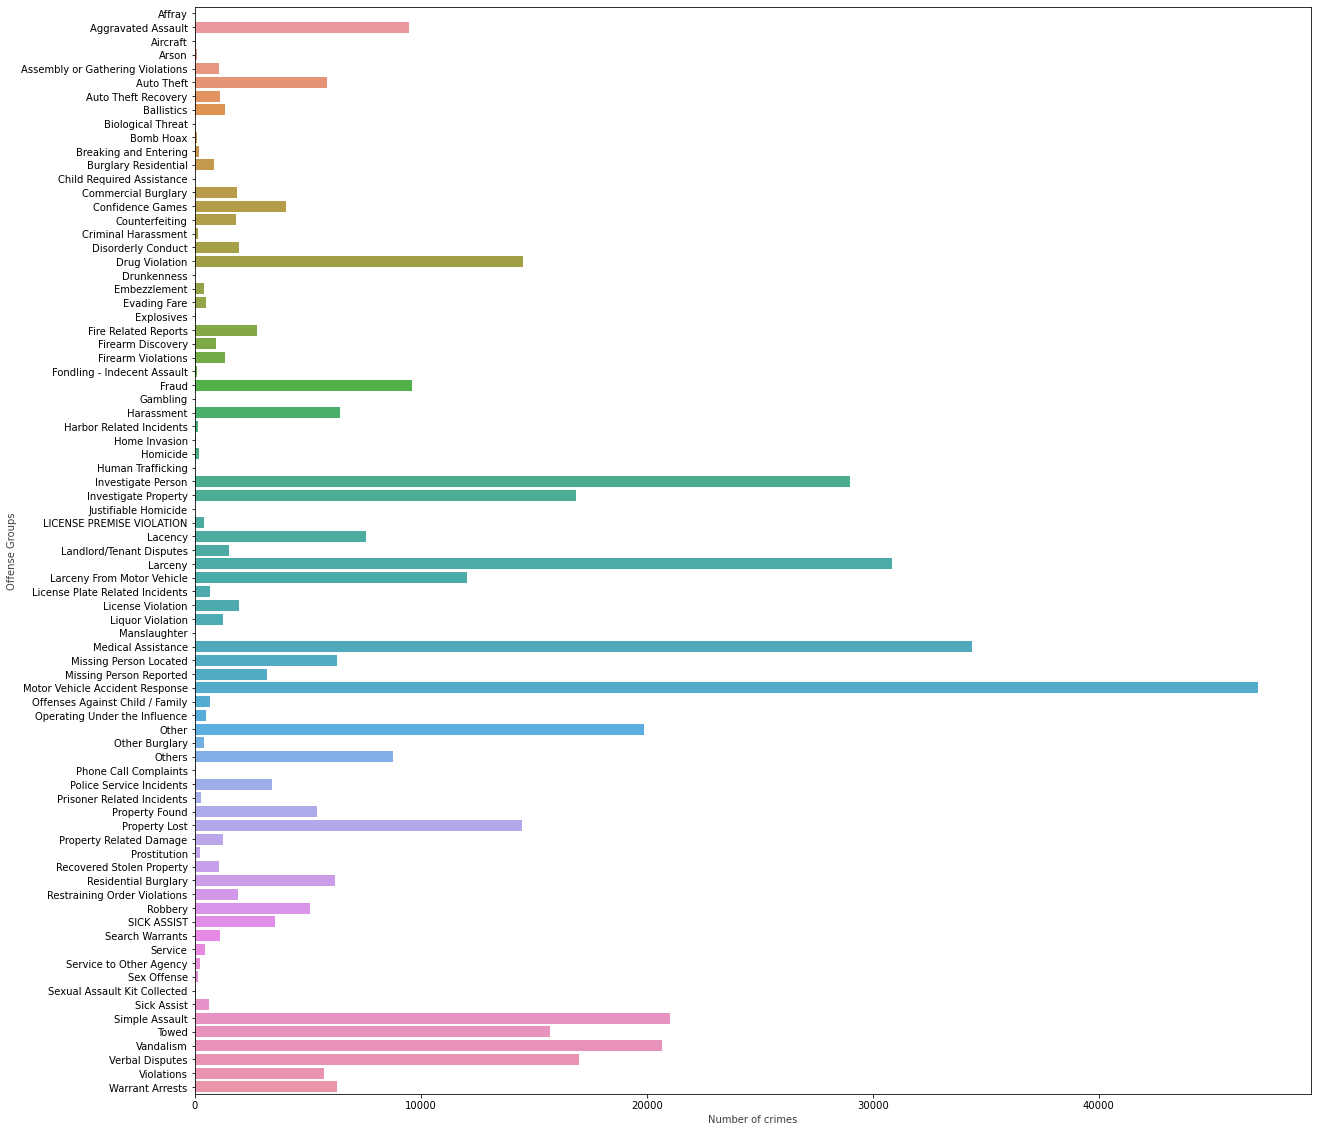

In [24]:
plot_data = df\
.groupby(["OFFENSE_CODE_GROUP"], as_index = False).size()
plt.figure(figsize=(20,20))
ax = sns.barplot(y="OFFENSE_CODE_GROUP", x="size", data=plot_data)
ax.set_ylabel("Offense Groups", alpha=0.75)
ax.set_xlabel("Number of crimes", alpha=0.75)
plt.show()

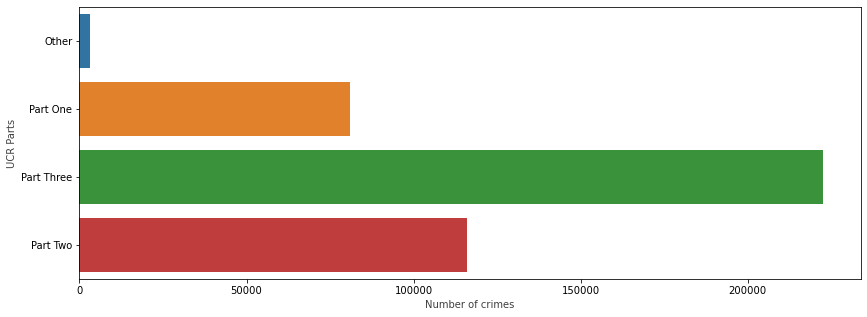

In [25]:
plot_data = df\
.groupby(["UCR_PART"], as_index = False).size()
plt.figure(figsize=(14,5))
ax = sns.barplot(y="UCR_PART", x="size", data=plot_data)
ax.set_ylabel("UCR Parts", alpha=0.75)
ax.set_xlabel("Number of crimes", alpha=0.75)
plt.show()

#### Question 2
Based on different districts in Boston, which district has higher crimes?
We notice that District B2 has the highest number of crimes followed by C11 and D4

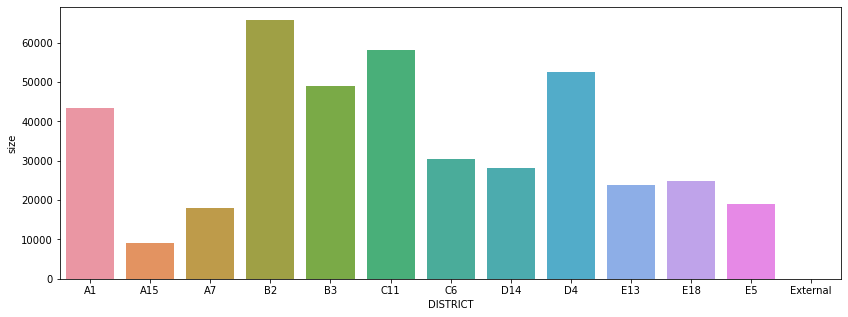

In [26]:
plot_data = df.groupby(["DISTRICT"], as_index = False).size()
plt.figure(figsize=(14,5))
ax = sns.barplot(x="DISTRICT",y='size', data=plot_data)
plt.show()

A scatter plot of the diferent locations of the crime and a comparison to the district map of Boston shown below

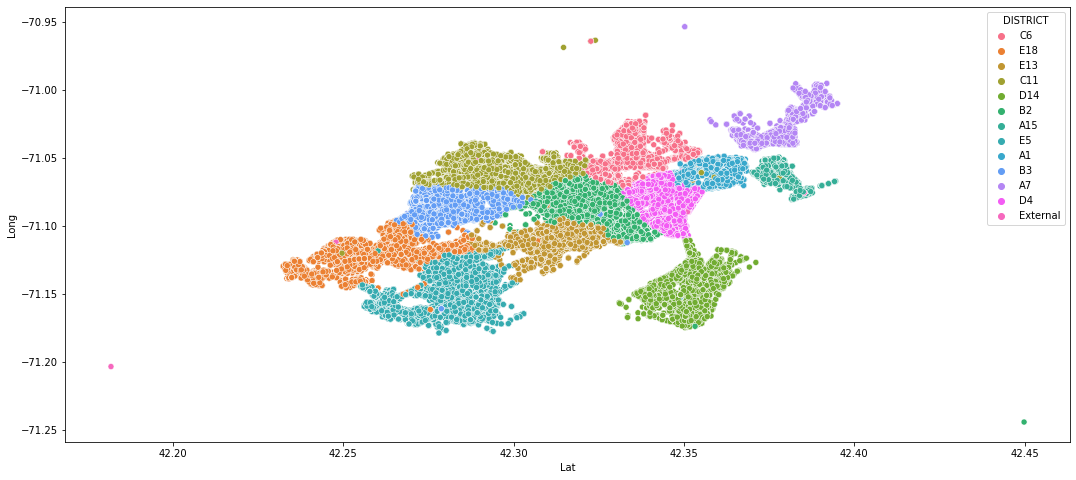

In [27]:
plot_data = df.groupby(["DISTRICT"], as_index = False).size()
plt.figure(figsize=(18,8))
ax = sns.scatterplot(x="Lat",y='Long', hue='DISTRICT',data=df)
plt.show()

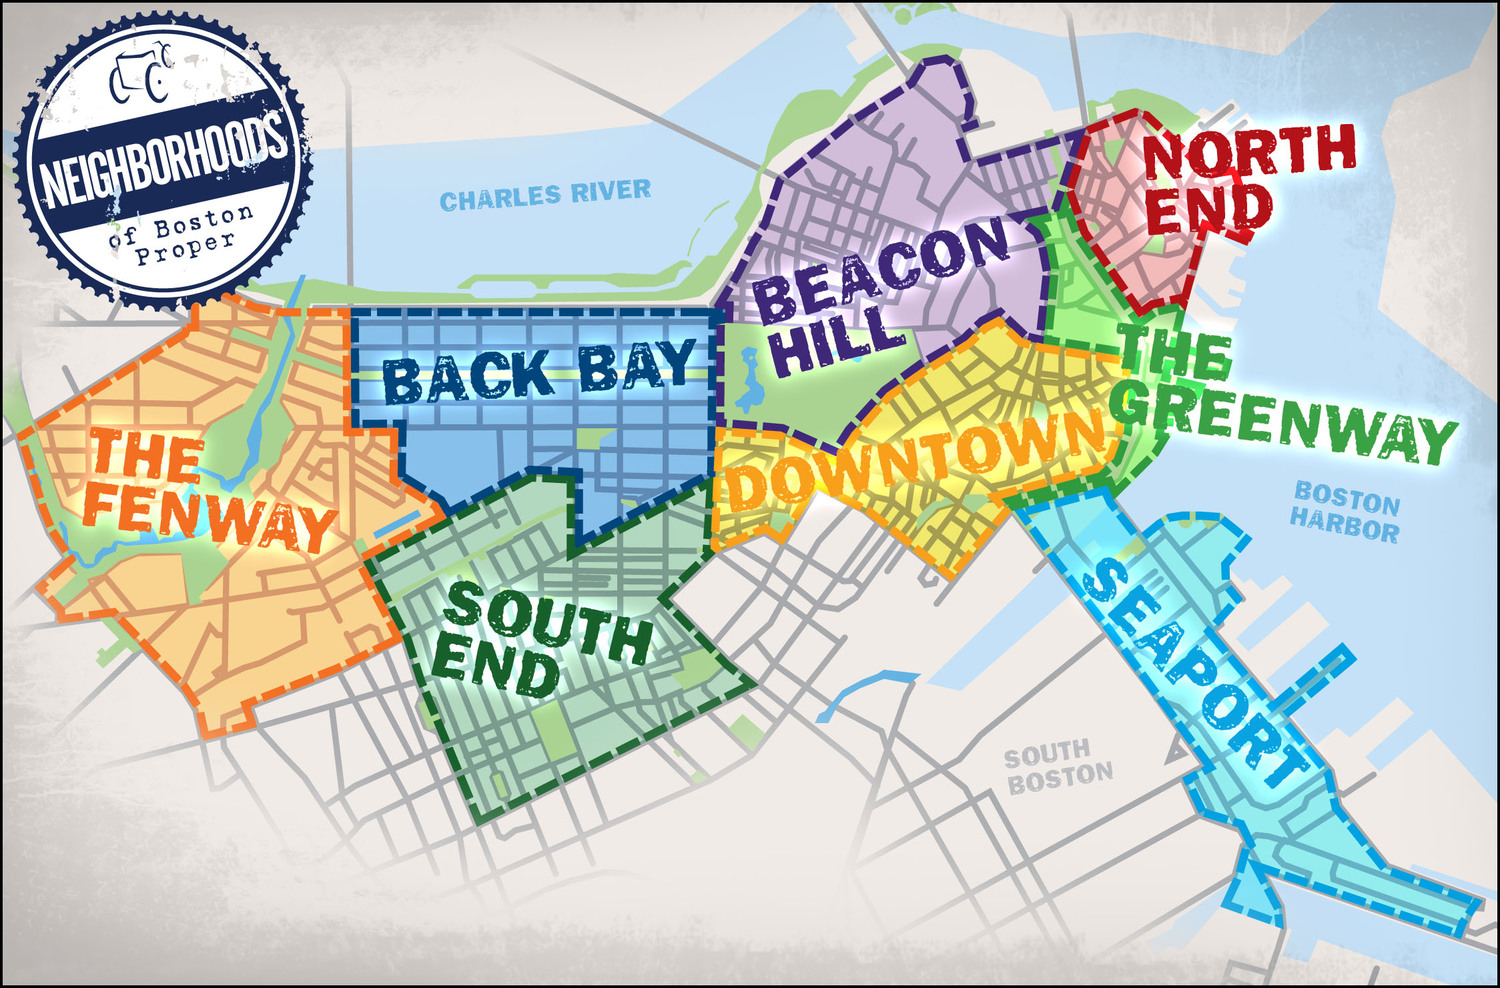![](https://drive.google.com/uc?export=view&id=1wCHuexlpDklB_Di34vJmIcTrCOfkJ7rC)

#### Question 3
What days do we observe most criminal activity?

Friday seems to see a lot of crimes and the number drops drastically by Sunday.

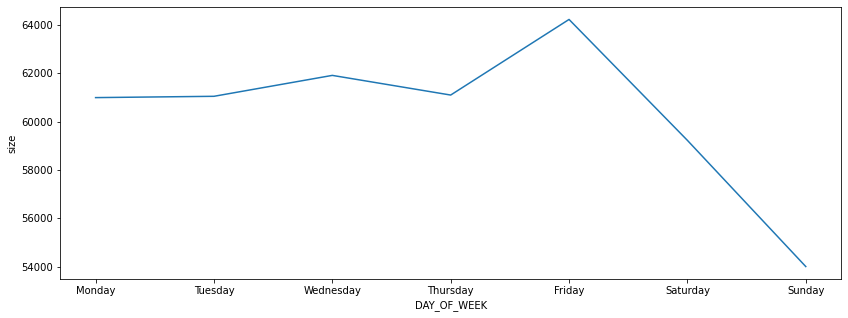

In [28]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
plot_data = df.groupby(["DAY_OF_WEEK"], as_index = False).size()
plot_data = plot_data.set_index('DAY_OF_WEEK').reindex(days)
plt.figure(figsize=(14,5))
ax = sns.lineplot(x="DAY_OF_WEEK",y='size', data=plot_data)
plt.show()

#### Question 4 
What hour of day do we observe most criminal activity?

Higher criminal activity takes place during the evenings and late nights.

Text(0, 0.5, 'Number of crimes')

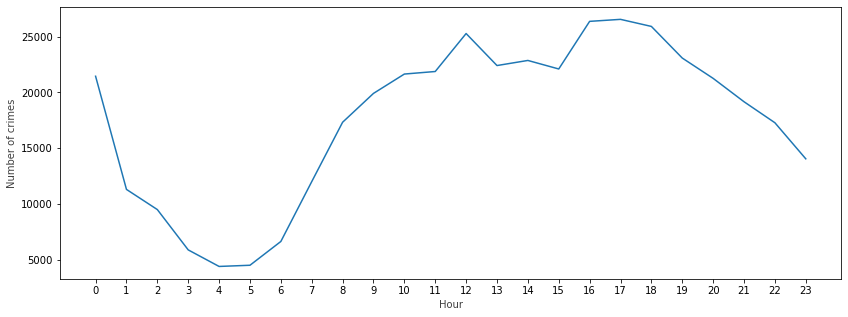

In [29]:
plot_data = df.groupby(["HOUR"], as_index = False).size()
plt.figure(figsize=(14,5))
ax2 = sns.lineplot(x="HOUR",y='size', data=plot_data)
ax2.set(xticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], xticklabels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
ax2.set_xlabel("Hour", alpha=0.75)
ax2.set_ylabel("Number of crimes", alpha=0.75)

#### Question 5
Has crimes increased over the years?
The number of crimes has be almost the same over the last 5 years. The data collected for 2015, and 2020 shows lower numbers because dataset had only a few months of information for those years

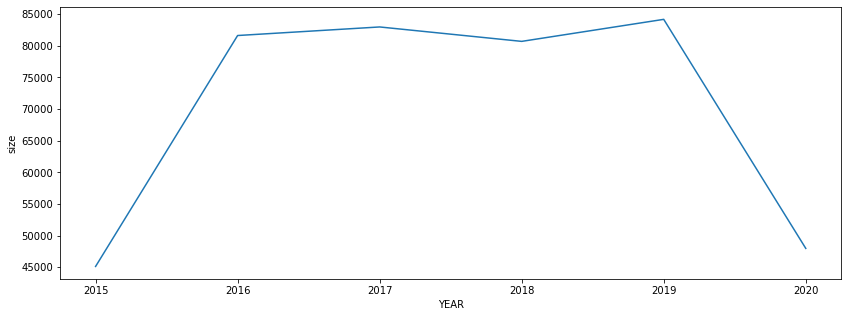

In [30]:
plot_data = df.groupby(["YEAR"], as_index = False).size()
# print(plot_data)
plt.figure(figsize=(14,5))
ax2 = sns.lineplot(x="YEAR",y='size', data=plot_data)

#### Question 6
Taking a deeper look into the top 4 Offence Groups, We can observe that there is an increase in the top 4 offence groups between the months of June to September.

<AxesSubplot:xlabel='MONTH', ylabel='Medical'>

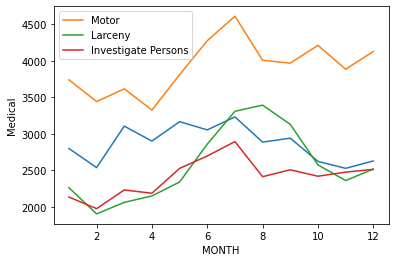

In [31]:
medical=df[df['OFFENSE_CODE_GROUP'] == 'Medical Assistance'].groupby('MONTH', as_index=False).size().set_index('MONTH')
motor = df[df['OFFENSE_CODE_GROUP'] == 'Motor Vehicle Accident Response'].groupby('MONTH', as_index=False).size().set_index('MONTH')
larceny = df[df['OFFENSE_CODE_GROUP'] == 'Larceny'].groupby('MONTH', as_index=False).size().set_index('MONTH')
ip = df[df['OFFENSE_CODE_GROUP'] == 'Investigate Person'].groupby('MONTH', as_index=False).size().set_index('MONTH')
medical.rename(columns={'size':'Medical'}, inplace=True)
larceny.rename(columns={'size':'Larceny'},  inplace=True)
motor.rename(columns={'size':'Motor'},  inplace=True)
ip.rename(columns={'size':'Investigate Persons'},  inplace=True)
# print(medical)
ax = sns.lineplot(x="MONTH",y='Medical', data=medical)
# sns.lineplot(ax=ax,x="MONTH",y='Larceny', data=larceny)
motor.plot(ax=ax)
larceny.plot(ax=ax)
ip.plot(ax=ax)